In [ ]:
# Python机器学习项目模版

# 1. 准备
# a) 导入类库
# b) 导入数据集

# 2. 理解数据
# a) 描述性统计
# b) 数据可视化

# 3. 数据准备
# a) 数据清洗
# b) 特征选择
# c) 数据转换

# 4. 评估算法
# a) 分离数据集
# b) 评估选项和评估矩阵
# c) 算法审查
# d) 算法比较

# 5. 改善模型
# a) 算法调参
# b) 集成算法

# 6. 结果部署
# a) 预测评估数据集
# b) 利用整个数据集生产模型
# c) 序列化模型

(506, 14)
CRIM       float64
ZN         float64
INDUS      float64
CHAS         int64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX        float64
PRTATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object
        CRIM    ZN  INDUS  CHAS   NOX    RM    AGE   DIS  RAD    TAX  PRTATIO       B  LSTAT  MEDV
0   6.32e-03  18.0   2.31     0  0.54  6.58   65.2  4.09    1  296.0     15.3  396.90   4.98  24.0
1   2.73e-02   0.0   7.07     0  0.47  6.42   78.9  4.97    2  242.0     17.8  396.90   9.14  21.6
2   2.73e-02   0.0   7.07     0  0.47  7.18   61.1  4.97    2  242.0     17.8  392.83   4.03  34.7
3   3.24e-02   0.0   2.18     0  0.46  7.00   45.8  6.06    3  222.0     18.7  394.63   2.94  33.4
4   6.91e-02   0.0   2.18     0  0.46  7.15   54.2  6.06    3  222.0     18.7  396.90   5.33  36.2
5   2.99e-02   0.0   2.18     0  0.46  6.43   58.7  6.06    3  222.0     18.7  394.12   5.21  28.7
6   8.83e-02  12.

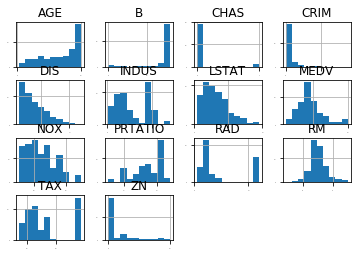

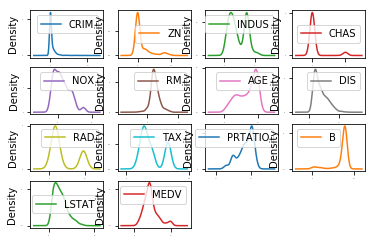

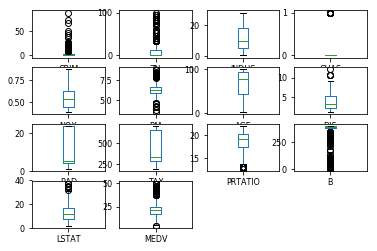

In [ ]:
import numpy as np
from numpy import arange
from matplotlib import pyplot
from pandas import read_csv
from pandas import set_option
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings("ignore")
# 导入数据
filename = 'data/housing.csv'
names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS',
         'RAD', 'TAX', 'PRTATIO', 'B', 'LSTAT', 'MEDV']
dataset = read_csv(filename, names=names, delim_whitespace=True)

# 数据维度
print(dataset.shape)

# 特征熟悉的字段类型
print(dataset.dtypes)

# 查看最开始的30条记录
set_option('display.width', 120)
print(dataset.head(30))

# 描述性统计信息
set_option('precision', 1)
print(dataset.describe())

# 关联关系
set_option('precision', 2)
print(dataset.corr(method='pearson'))

# 直方图
dataset.hist(sharex=False, sharey=False, xlabelsize=1, ylabelsize=1)
pyplot.show()

# 密度图
dataset.plot(kind='density', subplots=True, layout=(4,4), sharex=False, fontsize=1)
pyplot.show()

# 箱线图
dataset.plot(kind='box', subplots=True, layout=(4,4), sharex=False, sharey=False, fontsize=8)
pyplot.show()

# 散点矩阵图
scatter_matrix(dataset)
pyplot.show()

# 相关矩阵图
fig = pyplot.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(dataset.corr(), vmin=-1, vmax=1, interpolation='none')
fig.colorbar(cax)
ticks = np.arange(0, 14, 1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(names)
ax.set_yticklabels(names)
pyplot.show()

# 分离数据集
array = dataset.values
X = array[:, 0:13]
Y = array[:, 13]
validation_size = 0.2
seed = 7
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y,test_size=validation_size, random_state=seed)

# 评估算法 - 评估标准
num_folds = 10
seed = 7
scoring = 'neg_mean_squared_error'

# 评估算法 - baseline
models = {}
models['LR'] = LinearRegression()
models['LASSO'] = Lasso()
models['EN'] = ElasticNet()
models['KNN'] = KNeighborsRegressor()
models['CART'] = DecisionTreeRegressor()
models['SVM'] = SVR()
# 评估算法
results = []
for key in models:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_result = cross_val_score(models[key], X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_result)
    print('%s: %f (%f)' % (key, cv_result.mean(), cv_result.std()))
#评估算法 - 箱线图
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(models.keys())
pyplot.show()

# 评估算法 - 正态化数据
pipelines = {}
pipelines['ScalerLR'] = Pipeline([('Scaler', StandardScaler()), ('LR', LinearRegression())])
pipelines['ScalerLASSO'] = Pipeline([('Scaler', StandardScaler()), ('LASSO', Lasso())])
pipelines['ScalerEN'] = Pipeline([('Scaler', StandardScaler()), ('EN', ElasticNet())])
pipelines['ScalerKNN'] = Pipeline([('Scaler', StandardScaler()), ('KNN', KNeighborsRegressor())])
pipelines['ScalerCART'] = Pipeline([('Scaler', StandardScaler()), ('CART', DecisionTreeRegressor())])
pipelines['ScalerSVM'] = Pipeline([('Scaler', StandardScaler()), ('SVM', SVR())])
results = []
for key in pipelines:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_result = cross_val_score(pipelines[key], X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_result)
    print('%s: %f (%f)' % (key, cv_result.mean(), cv_result.std()))
#评估算法 - 箱线图
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(models.keys())
pyplot.show()

# 调参改进算法 - KNN
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
param_grid = {'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21]}
model = KNeighborsRegressor()
kfold = KFold(n_splits=num_folds, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(X=rescaledX, y=Y_train)

print('最优：%s 使用%s' % (grid_result.best_score_, grid_result.best_params_))
cv_results = zip(grid_result.cv_results_['mean_test_score'],
                 grid_result.cv_results_['std_test_score'],
                 grid_result.cv_results_['params'])
for mean, std, param in cv_results:
    print('%f (%f) with %r' % (mean, std, param))

# 集成算法
ensembles = {}
ensembles['ScaledAB'] = Pipeline([('Scaler', StandardScaler()), ('AB', AdaBoostRegressor())])
ensembles['ScaledAB-KNN'] = Pipeline([('Scaler', StandardScaler()),
                                       ('ABKNN', AdaBoostRegressor(base_estimator=KNeighborsRegressor(n_neighbors=3)))])
ensembles['ScaledAB-LR'] = Pipeline([('Scaler', StandardScaler()), ('ABLR', AdaBoostRegressor(LinearRegression()))])
ensembles['ScaledRFR'] = Pipeline([('Scaler', StandardScaler()), ('RFR', RandomForestRegressor())])
ensembles['ScaledETR'] = Pipeline([('Scaler', StandardScaler()), ('ETR', ExtraTreesRegressor())])
ensembles['ScaledGBR'] = Pipeline([('Scaler', StandardScaler()), ('RBR', GradientBoostingRegressor())])

results = []
for key in ensembles:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_result = cross_val_score(ensembles[key], X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_result)
    print('%s: %f (%f)' % (key, cv_result.mean(), cv_result.std()))

# 集成算法 - 箱线图
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(ensembles.keys())
pyplot.show()

# 集成算法GBM - 调参
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
param_grid = {'n_estimators': [10, 50, 100, 200, 300, 400, 500, 600, 700, 800, 900]}
model = GradientBoostingRegressor()
kfold = KFold(n_splits=num_folds, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(X=rescaledX, y=Y_train)
print('最优：%s 使用%s' % (grid_result.best_score_, grid_result.best_params_))

# 集成算法ET - 调参
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
param_grid = {'n_estimators': [5, 10, 20, 30, 40, 50, 60, 70, 80]}
model = ExtraTreesRegressor()
kfold = KFold(n_splits=num_folds, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(X=rescaledX, y=Y_train)
print('最优：%s 使用%s' % (grid_result.best_score_, grid_result.best_params_))

#训练模型
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
gbr = ExtraTreesRegressor(n_estimators=80)
gbr.fit(X=rescaledX, y=Y_train)
# 评估算法模型
rescaledX_validation = scaler.transform(X_validation)
predictions = gbr.predict(rescaledX_validation)
print(mean_squared_error(Y_validation, predictions))

In [ ]:
#二分类
import numpy as np
from matplotlib import pyplot
from pandas import read_csv
from pandas.plotting import scatter_matrix
from pandas import set_option
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier

# 导入数据
filename = 'data/sonar.all-data.csv'
dataset = read_csv(filename, header=None)

# 数据维度
print(dataset.shape)

# 查看数据类型
set_option('display.max_rows', 500)
print(dataset.dtypes)

# 查看最初的20条记录
set_option('display.width', 100)
print(dataset.head(20))

# 描述性统计信息
set_option('precision', 3)
print(dataset.describe())

# 数据的分类分布
print(dataset.groupby(60).size())

# 直方图
dataset.hist(sharex=False, sharey=False,xlabelsize=1, ylabelsize=1)
pyplot.show()

# 密度图
dataset.plot(kind='density', subplots=True, layout=(8, 8), sharex=False, legend=False, fontsize=1)
pyplot.show()

# 关系矩阵图
fig = pyplot.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(dataset.corr(), vmin=-1, vmax=1, interpolation='none')
fig.colorbar(cax)
pyplot.show()

# 分离评估数据集
array = dataset.values
X = array[:, 0:60].astype(float)
Y = array[:, 60]
validation_size = 0.2
seed = 7
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=validation_size, random_state=seed)

# 评估算法的基准
num_folds = 10
seed = 7
scoring = 'accuracy'

# 评估算法 - 原始数据
models = {}
models['LR'] = LogisticRegression()
models['LDA'] = LinearDiscriminantAnalysis()
models['KNN'] = KNeighborsClassifier()
models['CART'] = DecisionTreeClassifier()
models['NB'] = GaussianNB()
models['SVM'] = SVC()
results = []
for key in models:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(models[key], X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    print('%s : %f (%f)' % (key, cv_results.mean(), cv_results.std()))

# 评估算法 - 箱线图
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(models.keys())
pyplot.show()

# 评估算法 - 正态化数据
pipelines = {}
pipelines['ScalerLR'] = Pipeline([('Scaler', StandardScaler()), ('LR', LogisticRegression())])
pipelines['ScalerLDA'] = Pipeline([('Scaler', StandardScaler()), ('LDA', LinearDiscriminantAnalysis())])
pipelines['ScalerKNN'] = Pipeline([('Scaler', StandardScaler()), ('KNN', KNeighborsClassifier())])
pipelines['ScalerCART'] = Pipeline([('Scaler', StandardScaler()), ('CART', DecisionTreeClassifier())])
pipelines['ScalerNB'] = Pipeline([('Scaler', StandardScaler()), ('NB', GaussianNB())])
pipelines['ScalerSVM'] = Pipeline([('Scaler', StandardScaler()), ('SVM', SVC())])
results = []
for key in pipelines:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(pipelines[key], X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    print('%s : %f (%f)' % (key, cv_results.mean(), cv_results.std()))

# 评估算法 - 箱线图
fig = pyplot.figure()
fig.suptitle('Scaled Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(models.keys())
pyplot.show()

# 调参改进算法 - KNN
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
param_grid = {'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21]}
model = KNeighborsClassifier()
kfold = KFold(n_splits=num_folds, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(X=rescaledX, y=Y_train)

print('最优：%s 使用%s' % (grid_result.best_score_, grid_result.best_params_))
cv_results = zip(grid_result.cv_results_['mean_test_score'],
                 grid_result.cv_results_['std_test_score'],
                 grid_result.cv_results_['params'])
for mean, std, param in cv_results:
    print('%f (%f) with %r' % (mean, std, param))

# 调参改进算法 - SVM
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train).astype(float)
param_grid = {}
param_grid['C'] = [0.1, 0.3, 0.5, 0.7, 0.9, 1.0, 1.3, 1.5, 1.7, 2.0]
param_grid['kernel'] = ['linear', 'poly', 'rbf', 'sigmoid']
model = SVC()
kfold = KFold(n_splits=num_folds, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(X=rescaledX, y=Y_train)

print('最优：%s 使用%s' % (grid_result.best_score_, grid_result.best_params_))
cv_results = zip(grid_result.cv_results_['mean_test_score'],
                 grid_result.cv_results_['std_test_score'],
                 grid_result.cv_results_['params'])
for mean, std, param in cv_results:
    print('%f (%f) with %r' % (mean, std, param))


# 集成算法
ensembles = {}
ensembles['ScaledAB'] = Pipeline([('Scaler', StandardScaler()), ('AB', AdaBoostClassifier())])
ensembles['ScaledGBM'] = Pipeline([('Scaler', StandardScaler()), ('GBM', GradientBoostingClassifier())])
ensembles['ScaledRF'] = Pipeline([('Scaler', StandardScaler()), ('RFR', RandomForestClassifier())])
ensembles['ScaledET'] = Pipeline([('Scaler', StandardScaler()), ('ETR', ExtraTreesClassifier())])

results = []
for key in ensembles:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_result = cross_val_score(ensembles[key], X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_result)
    print('%s: %f (%f)' % (key, cv_result.mean(), cv_result.std()))

# 集成算法 - 箱线图
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(ensembles.keys())
pyplot.show()

# 集成算法GBM - 调参
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
param_grid = {'n_estimators': [10, 50, 100, 200, 300, 400, 500, 600, 700, 800, 900]}
model = GradientBoostingClassifier()
kfold = KFold(n_splits=num_folds, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(X=rescaledX, y=Y_train)
print('最优：%s 使用%s' % (grid_result.best_score_, grid_result.best_params_))

# 模型最终化
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
model = SVC(C=1.5, kernel='rbf')
model.fit(X=rescaledX, y=Y_train)
# 评估模型
rescaled_validationX = scaler.transform(X_validation)
predictions = model.predict(rescaled_validationX)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

In [ ]:
#文本分类
from sklearn.datasets import load_files
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# 1) 导入数据
categories = ['alt.atheism',
              'rec.sport.hockey',
              'comp.graphics',
              'sci.crypt',
              'comp.os.ms-windows.misc',
              'sci.electronics',
              'comp.sys.ibm.pc.hardware',
              'sci.med',
              'comp.sys.mac.hardware',
              'sci.space',
              'comp.windows.x',
              'soc.religion.christian',
              'misc.forsale',
              'talk.politics.guns',
              'rec.autos' 
              'talk.politics.mideast',
              'rec.motorcycles',
              'talk.politics.misc',
              'rec.sport.baseball',
              'talk.religion.misc']
# 导入训练数据
train_path = 'data/20news-bydate-train'
dataset_train = load_files(container_path=train_path, categories=categories)
# 导入评估数据
test_path = 'data/20news-bydate-test'
dataset_test = load_files(container_path=test_path, categories=categories)

# 2）数据准备与理解

# 计算词频
count_vect = CountVectorizer(stop_words='english', decode_error='ignore')
X_train_counts = count_vect.fit_transform(dataset_train.data)
# 查看数据维度
print(X_train_counts.shape)

# 计算TF-IDF
tf_transformer = TfidfVectorizer(stop_words='english', decode_error='ignore')
X_train_counts_tf = tf_transformer.fit_transform(dataset_train.data)
# 查看数据维度
print(X_train_counts_tf.shape)


# 设置评估算法的基准
num_folds = 10
seed = 7
scoring = 'accuracy'


# 3）评估算法
# 生成算法模型
models = {}
models['LR'] = LogisticRegression()
models['SVM'] = SVC()
models['CART'] = DecisionTreeClassifier()
models['MNB'] = MultinomialNB()
models['KNN'] = KNeighborsClassifier()

# 比较算法
results = []
for key in models:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(models[key], X_train_counts_tf, dataset_train.target, cv=kfold, scoring=scoring)
    results.append(cv_results)
    print('%s : %f (%f)' % (key, cv_results.mean(), cv_results.std()))

# 箱线图比较算法
fig = plt.figure()
fig.suptitle('Algorithm Comparision')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(models.keys())
plt.show()

# 4）算法调参
# 调参LR
param_grid = {}
param_grid['C'] = [0.1, 5, 13, 15]
model = LogisticRegression()
kfold = KFold(n_splits=num_folds, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(X=X_train_counts_tf, y=dataset_train.target)
print('最优 : %s 使用 %s' % (grid_result.best_score_, grid_result.best_params_))

# 调参MNB
param_grid = {}
param_grid['alpha'] = [0.001, 0.01, 0.1, 1.5]
model = MultinomialNB()
kfold = KFold(n_splits=num_folds, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(X=X_train_counts_tf, y=dataset_train.target)
print('最优 : %s 使用 %s' % (grid_result.best_score_, grid_result.best_params_))

# 5）集成算法
ensembles = {}
ensembles['RF'] = RandomForestClassifier()
ensembles['AB'] = AdaBoostClassifier()
# 比较集成算法
results = []
for key in ensembles:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(ensembles[key], X_train_counts_tf, dataset_train.target, cv=kfold, scoring=scoring)
    results.append(cv_results)
    print('%s : %f (%f)' % (key, cv_results.mean(), cv_results.std()))

# 箱线图比较算法
fig = plt.figure()
fig.suptitle('Algorithm Comparision')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(ensembles.keys())
plt.show()

# 调参RF
param_grid = {}
param_grid['n_estimators'] = [10, 100, 150, 200]
model = RandomForestClassifier()
kfold = KFold(n_splits=num_folds, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(X=X_train_counts_tf, y=dataset_train.target)
print('最优 : %s 使用 %s' % (grid_result.best_score_, grid_result.best_params_))

# 6）生成模型
model = LogisticRegression(C=13)
model.fit(X_train_counts_tf, dataset_train.target)
X_test_counts = tf_transformer.transform(dataset_test.data)
predictions = model.predict(X_test_counts)
print(accuracy_score(dataset_test.target, predictions))
print(classification_report(dataset_test.target, predictions))